<a href="https://colab.research.google.com/github/kanpiromnida-cmd/madt6004-applied-stat/blob/main/%5Bt_test%5D_MK_Restaurants_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MK Restaurants Data Analysis

df_mk.head()


,branch_id,branch_name,location_type,region,area_type,day_of_week,is_weekend,time_of_day_bucket,is_promotion,channel,party_size,visit_datetime,avg_spend_per_head,total_bill
0,MK035,MK Mall 2,in_mall,Bangkok,CBD,Wed,False,Lunch,False,Delivery,3,2026-01-14 11:30:00,369.956502,1120.0
1,MK079,MK Standalone 15,out_mall,Bangkok,Suburban,Sun,True,Dinner,True,Dine-in,8,2026-01-04 18:45:00,205.726963,1610.0
2,MK110,MK Standalone 47,out_mall,Upcountry,CBD,Fri,False,Lunch,True,Delivery,4,2026-01-23 12:15:00,264.367812,1060.0
3,MK005,MK Mall 59,in_mall,Bangkok,Community,Tue,False,Lunch,False,Dine-in,3,2026-01-13 11:00:00,245.523001,755.0
4,MK001,MK Standalone 50,out_mall,Upcountry,Community,Mon,False,Lunch,False,Dine-in,10,2026-02-02 11:30:00,298.034462,3010.0



df_mk.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   branch_id           8000 non-null   object        
 1   branch_name         8000 non-null   object        
 2   location_type       8000 non-null   object        
 3   region              8000 non-null   object        
 4   area_type           8000 non-null   object        
 5   day_of_week         8000 non-null   object        
 6   is_weekend          8000 non-null   bool          
 7   time_of_day_bucket  8000 non-null   object        
 8   is_promotion        8000 non-null   bool          
 9   channel             8000 non-null   object        
 10  party_size          8000 non-null   int64         
 11  visit_datetime      8000 non-null   datetime64[ns]
 12  avg_spend_per_head  8000 non-null   float64       
 13  total_bill          8000 non-null 

,party_size,avg_spend_per_head,total_bill
count,8000.000000,8000.000000,8000.000000
mean,4.004875,276.286080,1102.994375
std,1.812046,73.554796,587.550052
min,1.000000,120.000000,150.000000
25%,3.000000,224.176392,675.000000
50%,4.000000,266.573335,1005.000000
75%,5.000000,317.855047,1415.000000
max,10.000000,600.000000,4010.000000



Sample groupby check: visits by location_type x time_of_day_bucket


time_of_day_bucket,Afternoon,Dinner,Late,Lunch
location_type,,,,
in_mall,543,2006,341,1264
out_mall,428,1930,273,1215



Basic EDA by location_type:


,location_type,visits,avg_total_bill,avg_spend_per_head,avg_party_size,promo_rate
0,in_mall,4154,1017.450650,287.443026,3.537313,0.219307
1,out_mall,3846,1195.388716,264.235649,4.509880,0.202548



Channel mix share by location_type:


,location_type,channel,share
0,in_mall,Delivery,0.113866
1,in_mall,Dine-in,0.793452
2,in_mall,Takeaway,0.092682
3,out_mall,Delivery,0.239210
4,out_mall,Dine-in,0.643266
5,out_mall,Takeaway,0.117525



Lunch vs Dinner comparison:


,location_type,time_of_day_bucket,visits,avg_total_bill,avg_party_size,promo_rate,avg_spend_per_head
0,in_mall,Dinner,2006,1083.743769,3.695912,0.206381,293.811539
1,in_mall,Lunch,1264,944.505538,3.382911,0.262658,278.657975
2,out_mall,Dinner,1930,1286.095855,4.733679,0.228497,270.550905
3,out_mall,Lunch,1215,1094.267490,4.255967,0.174486,256.403077



Weekend vs Weekday comparison:


,location_type,is_weekend,visits,avg_total_bill,avg_party_size,promo_rate,avg_spend_per_head
0,in_mall,False,2597,965.184829,3.439738,0.225645,281.023499
1,in_mall,True,1557,1104.627489,3.700064,0.208735,298.150483
2,out_mall,False,2499,1156.468587,4.425370,0.182073,261.071031
3,out_mall,True,1347,1267.594655,4.666667,0.240535,270.106755


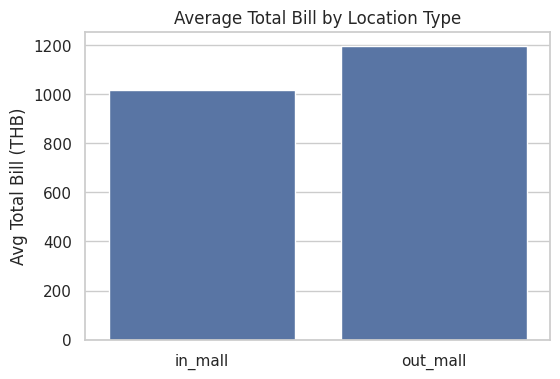

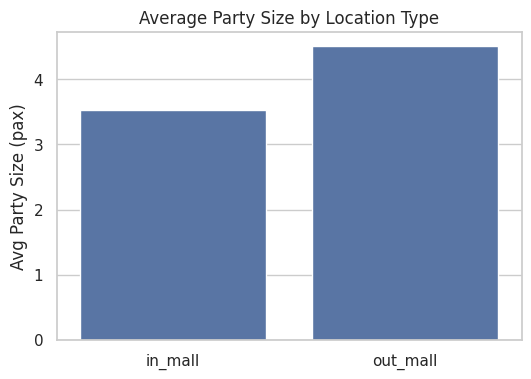

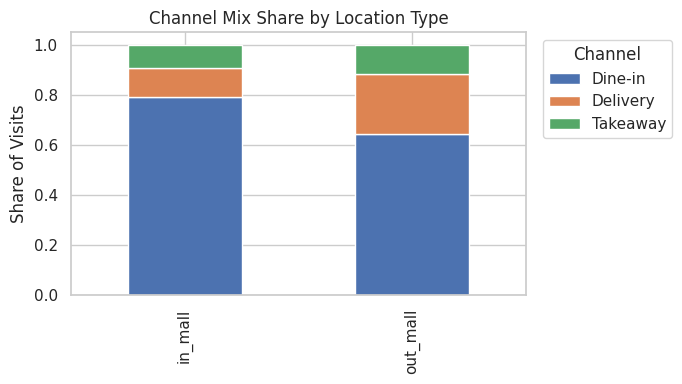

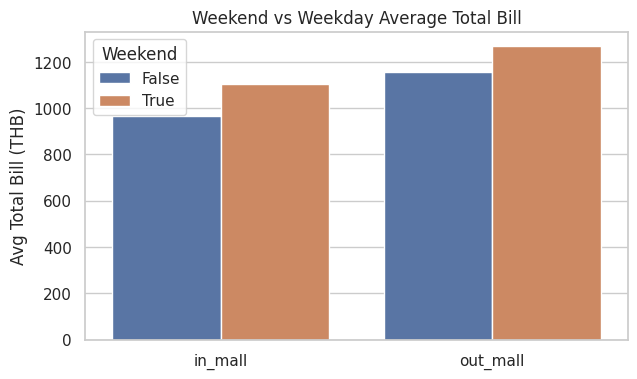



INSIGHT SUMMARY (EN)
- Visits: in_mall=4154 vs out_mall=3846.
- Avg total bill: in_mall=1017 THB vs out_mall=1195 THB.
- Avg party size: in_mall=3.54 pax vs out_mall=4.51 pax.
- Avg spend/head: in_mall=287 THB vs out_mall=264 THB.
- Promo rate: in_mall=21.9% vs out_mall=20.3%.
- Welch t-test (total_bill): p=8.14e-42, Cohen's d=-0.31 (synthetic but meaningful difference).

- Peak time buckets (top 2 by share):
  • in_mall: Dinner (48.3%)
  • in_mall: Lunch (30.4%)
  • out_mall: Dinner (50.2%)
  • out_mall: Lunch (31.6%)

- Weekend uplift (avg total bill):
  • in_mall: weekday=965 vs weekend=1105 THB
  • out_mall: weekday=1156 vs weekend=1268 THB


สรุป (TH) — ความต่างหลัก in_mall vs out_mall
• in_mall: ทราฟฟิกโดยรวมสูงกว่า + พีคช่วง Dinner และวันหยุด, กลุ่มเล็ก (2–3 คน) เด่น
• out_mall: กลุ่มใหญ่/ครอบครัว (3–6 คน) มากกว่า → บิลต่อครั้งสูงขึ้นแม้ spend ต่อหัวใกล้เคียง
• โปรโมชัน: in_mall เหมาะกับการดัน weekday lunch; out_mall เหมาะกับ family deal มื้อเย็น/วันหยุด
• ช่องทาง: in_mall เน้

In [1]:
# @title
# ============================================================
# MK Restaurants Thailand (Synthetic Data Mockup + Analysis)
# One-cell / one-block code for Google Colab
# Requirements: pandas, numpy, matplotlib, seaborn, scipy (optional)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats  # optional but typically available in Colab

# ----------------------------
# 1) Imports & Setup
# ----------------------------
pd.set_option("display.max_columns", 50)
sns.set_theme(style="whitegrid")
rng = np.random.default_rng(42)  # reproducible

# ----------------------------
# 2) Data Generation (create df_mk)
# ----------------------------
N = 8000          # 5,000–10,000 rows (visit-level)
n_branches = 120  # number of branches

branch_ids = [f"MK{str(i).zfill(3)}" for i in range(1, n_branches + 1)]

# Branch-level attributes
loc_by_branch = rng.choice(["in_mall", "out_mall"], size=n_branches, p=[0.55, 0.45])
regions = ["Bangkok", "Upcountry"]
area_types = ["CBD", "Suburban", "Community"]

branch_rows = []
for i, bid in enumerate(branch_ids):
    loc = loc_by_branch[i]
    if loc == "in_mall":
        region = rng.choice(regions, p=[0.65, 0.35])
        area = rng.choice(area_types, p=[0.45, 0.40, 0.15])
        name = f"MK Mall {rng.integers(1, 60)}"
    else:
        region = rng.choice(regions, p=[0.35, 0.65])
        area = rng.choice(area_types, p=[0.20, 0.40, 0.40])
        name = f"MK Standalone {rng.integers(1, 80)}"
    branch_rows.append((bid, name, loc, region, area))

df_branch = pd.DataFrame(
    branch_rows,
    columns=["branch_id", "branch_name", "location_type", "region", "area_type"]
)

dow = np.array(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])

def sample_day_of_week(loc, size):
    # in_mall: slightly higher weekend traffic
    if loc == "in_mall":
        probs = np.array([0.12, 0.12, 0.12, 0.12, 0.14, 0.19, 0.19])
    else:
        probs = np.array([0.13, 0.13, 0.13, 0.13, 0.13, 0.18, 0.17])
    probs = probs / probs.sum()
    return rng.choice(dow, size=size, p=probs)

def sample_time_bucket(loc, is_weekend_arr):
    # "Lunch", "Afternoon", "Dinner", "Late"
    buckets = np.empty(len(is_weekend_arr), dtype=object)
    for i, wk in enumerate(is_weekend_arr):
        if loc == "in_mall":
            probs = [0.28, 0.12, 0.52, 0.08] if wk else [0.32, 0.14, 0.46, 0.08]
        else:
            probs = [0.25, 0.10, 0.58, 0.07] if wk else [0.36, 0.12, 0.45, 0.07]
        buckets[i] = rng.choice(["Lunch", "Afternoon", "Dinner", "Late"], p=np.array(probs)/np.sum(probs))
    return buckets

def sample_promo(loc, is_weekend_arr, time_bucket_arr):
    # โปรโมชัน pattern ต่างกัน
    promo = np.zeros(len(is_weekend_arr), dtype=bool)
    for i, (wk, tb) in enumerate(zip(is_weekend_arr, time_bucket_arr)):
        if loc == "in_mall":
            p = 0.20
            if (not wk) and tb == "Lunch":
                p += 0.10  # weekday lunch booster
            if wk and tb == "Dinner":
                p += 0.03
        else:
            p = 0.18
            if wk and tb == "Dinner":
                p += 0.12  # family deal on weekend dinner
            if tb == "Late":
                p += 0.05
        promo[i] = rng.random() < p
    return promo

def sample_channel(loc, time_bucket_arr, promo_arr):
    # channel: Dine-in, Delivery, Takeaway
    ch = np.empty(len(time_bucket_arr), dtype=object)
    for i, (tb, promo) in enumerate(zip(time_bucket_arr, promo_arr)):
        if loc == "in_mall":
            base = np.array([0.78, 0.12, 0.10])
            if tb in ["Dinner", "Late"]:
                base += np.array([0.03, -0.02, -0.01])
            if promo:
                base += np.array([-0.02, 0.02, 0.00])
        else:
            base = np.array([0.66, 0.22, 0.12])
            if tb in ["Dinner", "Late"]:
                base += np.array([-0.03, 0.03, 0.00])
            if promo:
                base += np.array([-0.03, 0.04, -0.01])
        base = np.clip(base, 0.01, None)
        base = base / base.sum()
        ch[i] = rng.choice(["Dine-in", "Delivery", "Takeaway"], p=base)
    return ch

def sample_party_size(loc, time_bucket_arr, is_weekend_arr):
    # in_mall: more small groups 2–3 pax
    # out_mall: more family groups 3–5+ pax (dinner/weekend)
    ps = np.zeros(len(time_bucket_arr), dtype=int)
    for i, (tb, wk) in enumerate(zip(time_bucket_arr, is_weekend_arr)):
        if loc == "in_mall":
            lam = 2.3 + (0.3 if tb == "Dinner" else 0.0) + (0.2 if wk else 0.0)
            ps[i] = int(np.clip(rng.poisson(lam=lam) + 1, 1, 8))
        else:
            lam = 3.0 + (0.6 if tb == "Dinner" else 0.2) + (0.3 if wk else 0.0)
            ps[i] = int(np.clip(rng.poisson(lam=lam) + 1, 1, 10))
    return ps

def generate_visit_datetime(day_of_week_arr, time_bucket_arr):
    # Generate datetimes in Jan 2026 (mock period)
    start = pd.Timestamp("2026-01-01")
    end = pd.Timestamp("2026-02-01")
    days = (end - start).days

    dow_map = {"Mon":0, "Tue":1, "Wed":2, "Thu":3, "Fri":4, "Sat":5, "Sun":6}
    rand_days = rng.integers(0, days, size=len(day_of_week_arr))
    base_dates = start + pd.to_timedelta(rand_days, unit="D")
    base_dow = base_dates.dayofweek

    desired_dow = np.array([dow_map[d] for d in day_of_week_arr])
    shift = (desired_dow - base_dow) % 7
    dates = base_dates + pd.to_timedelta(shift, unit="D")

    hour = np.zeros(len(time_bucket_arr), dtype=int)
    minute = rng.choice([0, 15, 30, 45], size=len(time_bucket_arr))
    for i, tb in enumerate(time_bucket_arr):
        if tb == "Lunch":
            hour[i] = int(rng.integers(11, 14))  # 11–13
        elif tb == "Afternoon":
            hour[i] = int(rng.integers(14, 17))  # 14–16
        elif tb == "Dinner":
            hour[i] = int(rng.integers(17, 21))  # 17–20
        else:
            hour[i] = int(rng.integers(21, 23))  # 21–22
    return dates + pd.to_timedelta(hour, unit="h") + pd.to_timedelta(minute, unit="m")

def compute_spend_per_head(loc, is_weekend_arr, time_bucket_arr, promo_arr, region_arr, area_arr):
    # in_mall: slightly higher spend/head on weekends
    # out_mall: slightly lower spend/head but higher bill due to larger party size
    spend = np.zeros(len(time_bucket_arr), dtype=float)
    for i, (wk, tb, promo, reg, area) in enumerate(zip(is_weekend_arr, time_bucket_arr, promo_arr, region_arr, area_arr)):
        if loc == "in_mall":
            mu = 260 + (15 if wk else 0) + (10 if tb == "Dinner" else 0)
        else:
            mu = 245 + (8 if wk else 0) + (12 if tb == "Dinner" else 0)

        # area/region adjustments
        if reg == "Bangkok":
            mu += 10
        if area == "CBD":
            mu += 12
        elif area == "Community":
            mu -= 6

        # promo discount effect
        if promo:
            mu -= 12

        # lognormal noise
        spend[i] = np.clip(rng.lognormal(mean=np.log(mu), sigma=0.25), 120, 600)
    return spend

# ---- Create visit-level df_mk ----
branch_choices = rng.choice(df_branch["branch_id"].values, size=N, replace=True)
df_mk = df_branch.set_index("branch_id").loc[branch_choices].reset_index()

# day_of_week
df_mk["day_of_week"] = None
for loc in ["in_mall", "out_mall"]:
    idx = df_mk["location_type"].values == loc
    df_mk.loc[idx, "day_of_week"] = sample_day_of_week(loc, idx.sum())

df_mk["is_weekend"] = df_mk["day_of_week"].isin(["Sat", "Sun"])

# time_of_day_bucket
df_mk["time_of_day_bucket"] = None
for loc in ["in_mall", "out_mall"]:
    idx = df_mk["location_type"].values == loc
    df_mk.loc[idx, "time_of_day_bucket"] = sample_time_bucket(loc, df_mk.loc[idx, "is_weekend"].values)

# is_promotion
df_mk["is_promotion"] = False
for loc in ["in_mall", "out_mall"]:
    idx = df_mk["location_type"].values == loc
    df_mk.loc[idx, "is_promotion"] = sample_promo(
        loc,
        df_mk.loc[idx, "is_weekend"].values,
        df_mk.loc[idx, "time_of_day_bucket"].values
    )

# channel
df_mk["channel"] = None
for loc in ["in_mall", "out_mall"]:
    idx = df_mk["location_type"].values == loc
    df_mk.loc[idx, "channel"] = sample_channel(
        loc,
        df_mk.loc[idx, "time_of_day_bucket"].values,
        df_mk.loc[idx, "is_promotion"].values
    )

# party_size
df_mk["party_size"] = 1
for loc in ["in_mall", "out_mall"]:
    idx = df_mk["location_type"].values == loc
    df_mk.loc[idx, "party_size"] = sample_party_size(
        loc,
        df_mk.loc[idx, "time_of_day_bucket"].values,
        df_mk.loc[idx, "is_weekend"].values
    )

# visit_datetime
df_mk["visit_datetime"] = generate_visit_datetime(df_mk["day_of_week"].values, df_mk["time_of_day_bucket"].values)

# avg_spend_per_head
df_mk["avg_spend_per_head"] = np.nan
for loc in ["in_mall", "out_mall"]:
    idx = df_mk["location_type"].values == loc
    df_mk.loc[idx, "avg_spend_per_head"] = compute_spend_per_head(
        loc,
        df_mk.loc[idx, "is_weekend"].values,
        df_mk.loc[idx, "time_of_day_bucket"].values,
        df_mk.loc[idx, "is_promotion"].values,
        df_mk.loc[idx, "region"].values,
        df_mk.loc[idx, "area_type"].values
    )

# total_bill
addon = rng.normal(loc=0, scale=25, size=N)
df_mk["total_bill"] = np.clip(df_mk["avg_spend_per_head"] * df_mk["party_size"] + addon, 150, None)
df_mk["total_bill"] = (df_mk["total_bill"] / 5).round() * 5  # round to 5 THB

# ----------------------------
# 3) Quick Preview (head/info/describe + groupby example)
# ----------------------------
print("df_mk.head()")
display(df_mk.head())

print("\ndf_mk.info()")
df_mk.info()

print("\nDescribe (numeric):")
display(df_mk[["party_size", "avg_spend_per_head", "total_bill"]].describe())

print("\nSample groupby check: visits by location_type x time_of_day_bucket")
display(df_mk.groupby(["location_type", "time_of_day_bucket"]).size().unstack(fill_value=0))

# ----------------------------
# 4) Analysis by location_type
# ----------------------------
agg_basic = df_mk.groupby("location_type").agg(
    visits=("branch_id", "size"),
    avg_total_bill=("total_bill", "mean"),
    avg_spend_per_head=("avg_spend_per_head", "mean"),
    avg_party_size=("party_size", "mean"),
    promo_rate=("is_promotion", "mean")
).reset_index()

print("\nBasic EDA by location_type:")
display(agg_basic)

# Channel mix share by location_type
channel_counts = df_mk.groupby(["location_type", "channel"]).size().reset_index(name="cnt")
channel_counts["share"] = channel_counts["cnt"] / channel_counts.groupby("location_type")["cnt"].transform("sum")
channel_mix = channel_counts[["location_type", "channel", "share"]].sort_values(["location_type", "channel"])

print("\nChannel mix share by location_type:")
display(channel_mix)

# Time-based comparison: Lunch vs Dinner
time_comp = (
    df_mk[df_mk["time_of_day_bucket"].isin(["Lunch", "Dinner"])]
    .groupby(["location_type", "time_of_day_bucket"])
    .agg(
        visits=("branch_id", "size"),
        avg_total_bill=("total_bill", "mean"),
        avg_party_size=("party_size", "mean"),
        promo_rate=("is_promotion", "mean"),
        avg_spend_per_head=("avg_spend_per_head", "mean"),
    )
    .reset_index()
)
print("\nLunch vs Dinner comparison:")
display(time_comp)

# Weekend vs Weekday
week_comp = (
    df_mk.groupby(["location_type", "is_weekend"])
    .agg(
        visits=("branch_id", "size"),
        avg_total_bill=("total_bill", "mean"),
        avg_party_size=("party_size", "mean"),
        promo_rate=("is_promotion", "mean"),
        avg_spend_per_head=("avg_spend_per_head", "mean"),
    )
    .reset_index()
)
print("\nWeekend vs Weekday comparison:")
display(week_comp)

# ----------------------------
# 5) Visualizations (matplotlib/seaborn)
# ----------------------------
plt.figure(figsize=(6,4))
sns.barplot(data=agg_basic, x="location_type", y="avg_total_bill")
plt.title("Average Total Bill by Location Type")
plt.ylabel("Avg Total Bill (THB)")
plt.xlabel("")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(data=agg_basic, x="location_type", y="avg_party_size")
plt.title("Average Party Size by Location Type")
plt.ylabel("Avg Party Size (pax)")
plt.xlabel("")
plt.show()

pivot_mix = channel_mix.pivot(index="location_type", columns="channel", values="share").fillna(0)
pivot_mix = pivot_mix[["Dine-in", "Delivery", "Takeaway"]]
pivot_mix.plot(kind="bar", stacked=True, figsize=(7,4))
plt.title("Channel Mix Share by Location Type")
plt.ylabel("Share of Visits")
plt.xlabel("")
plt.legend(title="Channel", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,4))
sns.barplot(data=week_comp, x="location_type", y="avg_total_bill", hue="is_weekend")
plt.title("Weekend vs Weekday Average Total Bill")
plt.ylabel("Avg Total Bill (THB)")
plt.xlabel("")
plt.legend(title="Weekend")
plt.show()

# ----------------------------
# 6) Insight Summary (EN) + (optional) statistical check
# ----------------------------
in_bill = df_mk.loc[df_mk["location_type"] == "in_mall", "total_bill"].to_numpy()
out_bill = df_mk.loc[df_mk["location_type"] == "out_mall", "total_bill"].to_numpy()

t_stat, p_val = stats.ttest_ind(in_bill, out_bill, equal_var=False)

def cohens_d(a, b):
    a = np.asarray(a); b = np.asarray(b)
    na, nb = len(a), len(b)
    sa2, sb2 = a.var(ddof=1), b.var(ddof=1)
    sp = np.sqrt(((na-1)*sa2 + (nb-1)*sb2) / (na+nb-2))
    return (a.mean() - b.mean()) / sp

d = cohens_d(in_bill, out_bill)

def fmt_pct(x):
    return f"{x*100:.1f}%"

in_row = agg_basic.loc[agg_basic["location_type"]=="in_mall"].iloc[0]
out_row = agg_basic.loc[agg_basic["location_type"]=="out_mall"].iloc[0]

# Peak time buckets (top 2)
tb_counts = df_mk.groupby(["location_type", "time_of_day_bucket"]).size().reset_index(name="cnt")
tb_counts["share"] = tb_counts["cnt"] / tb_counts.groupby("location_type")["cnt"].transform("sum")
peak_tb_top = (
    tb_counts.sort_values(["location_type", "share"], ascending=[True, False])
    .groupby("location_type")
    .head(2)
)

wk = week_comp.pivot(index="location_type", columns="is_weekend", values="avg_total_bill")

print("\n\n========================")
print("INSIGHT SUMMARY (EN)")
print("========================")
print(f"- Visits: in_mall={int(in_row['visits'])} vs out_mall={int(out_row['visits'])}.")
print(f"- Avg total bill: in_mall={in_row['avg_total_bill']:.0f} THB vs out_mall={out_row['avg_total_bill']:.0f} THB.")
print(f"- Avg party size: in_mall={in_row['avg_party_size']:.2f} pax vs out_mall={out_row['avg_party_size']:.2f} pax.")
print(f"- Avg spend/head: in_mall={in_row['avg_spend_per_head']:.0f} THB vs out_mall={out_row['avg_spend_per_head']:.0f} THB.")
print(f"- Promo rate: in_mall={fmt_pct(in_row['promo_rate'])} vs out_mall={fmt_pct(out_row['promo_rate'])}.")
print(f"- Welch t-test (total_bill): p={p_val:.2e}, Cohen's d={d:.2f} (synthetic but meaningful difference).")

print("\n- Peak time buckets (top 2 by share):")
for _, r in peak_tb_top.iterrows():
    print(f"  • {r['location_type']}: {r['time_of_day_bucket']} ({fmt_pct(r['share'])})")

print("\n- Weekend uplift (avg total bill):")
print(f"  • in_mall: weekday={wk.loc['in_mall', False]:.0f} vs weekend={wk.loc['in_mall', True]:.0f} THB")
print(f"  • out_mall: weekday={wk.loc['out_mall', False]:.0f} vs weekend={wk.loc['out_mall', True]:.0f} THB")

# ----------------------------
# 7) Marketing Campaign Suggestions (TH) + short Thai summary at the end
# ----------------------------
print("\n\n========================")
print("สรุป (TH) — ความต่างหลัก in_mall vs out_mall")
print("========================")
print("• in_mall: ทราฟฟิกโดยรวมสูงกว่า + พีคช่วง Dinner และวันหยุด, กลุ่มเล็ก (2–3 คน) เด่น")
print("• out_mall: กลุ่มใหญ่/ครอบครัว (3–6 คน) มากกว่า → บิลต่อครั้งสูงขึ้นแม้ spend ต่อหัวใกล้เคียง")
print("• โปรโมชัน: in_mall เหมาะกับการดัน weekday lunch; out_mall เหมาะกับ family deal มื้อเย็น/วันหยุด")
print("• ช่องทาง: in_mall เน้น Dine-in สูงกว่า; out_mall มี Delivery share สูงกว่า (โดยเฉพาะมื้อเย็น/ตอนมีโปร)")

print("\n\n========================")
print("Campaign Ideas (TH) — พร้อมเสนอทีมการตลาด")
print("========================")

campaigns_inmall = [
    {
        "name": "Mall Lunch Booster Set",
        "target": "in_mall | วันธรรมดา Lunch | 1–3 คน (ออฟฟิศ/นักเรียน/ช้อปปิ้งเบรก)",
        "mechanic": "เซ็ตกลางวันราคาพิเศษ + add-on ของหวาน/เครื่องดื่มลดเพิ่มเมื่อสแกน QR",
        "message": "พักเที่ยงเร็ว อิ่มคุ้มในห้าง — เซ็ต MK พร้อมเสิร์ฟ",
        "kpi": "Uplift visits (weekday lunch), promo redemption, attach rate"
    },
    {
        "name": "Shopping Break Combo",
        "target": "in_mall | Afternoon–Dinner | นักช้อป + คู่รัก",
        "mechanic": "ใบเสร็จในห้างครบ X บาท รับคูปอง MK ฟรีเมนูทานเล่น/ส่วนลด (co-promo)",
        "message": "ช้อปเหนื่อย แวะเติมพลังที่ MK — ดีลจากใบเสร็จในห้าง",
        "kpi": "Coupon redemption, incremental visits, avg spend/head"
    },
    {
        "name": "Weekend Premium Top-up",
        "target": "in_mall | Weekend Dinner | 2–3 คน",
        "mechanic": "อัปเกรดน้ำซุป/เมนูพรีเมียมแบบ top-up ราคาต่ำ + limited menu",
        "message": "สุดสัปดาห์นี้อัปเกรดมื้อพิเศษ — พรีเมียมได้ในงบเดิม",
        "kpi": "Avg spend/head uplift, premium mix, repeat rate"
    },
]

campaigns_outmall = [
    {
        "name": "Family Dinner Bundle",
        "target": "out_mall | Dinner + Weekend | 3–6 คน (ครอบครัว)",
        "mechanic": "ชุดครอบครัวราคาเหมาจ่าย + เด็กกินฟรี/ลดพิเศษ (ตามเงื่อนไข) + ของสะสม",
        "message": "มื้อครอบครัวต้อง MK — อิ่มครบ คุ้มทั้งบ้าน",
        "kpi": "Dinner visits uplift, avg total_bill uplift, bundle mix"
    },
    {
        "name": "Community Night (Local Love)",
        "target": "out_mall | Weekday Dinner | ชุมชน/หมู่บ้านใกล้สาขา",
        "mechanic": "คืนชุมชนลดพิเศษเมื่อยืนยันพื้นที่ + จับมือเพจชุมชน/คอนโด",
        "message": "ร้านใกล้บ้าน — ดีลพิเศษเพื่อคนพื้นที่",
        "kpi": "New customers in catchment, 30D repeat, local reach"
    },
    {
        "name": "Delivery Power Hour",
        "target": "out_mall | Dinner–Late | ลูกค้าสั่งเดลิเวอรี",
        "mechanic": "19:00–22:00 ลดค่าส่ง/แถมเมนูทานเล่น เมื่อสั่งขั้นต่ำ X บาท",
        "message": "หิวดึกก็ MK ส่งไว — ดีลเฉพาะช่วงพาวเวอร์อาวร์",
        "kpi": "Delivery orders uplift, avg basket size, CAC by platform"
    },
]

cross_segment = [
    {
        "name": "MK Points Mission: Visit & Collect",
        "target": "ทุกสาขา (ตั้ง mission ต่างกัน) | in_mall เน้น weekday lunch/afternoon | out_mall เน้น dinner/weekend",
        "mechanic": "ภารกิจสะสมแต้มตามช่วงเวลา ปลดล็อคคูปอง/เมนูพิเศษ",
        "message": "กินครบภารกิจ รับแต้ม/คูปองเพิ่ม — เลือกเวลาที่คุ้มสุด",
        "kpi": "Repeat rate, visit frequency/user, incremental revenue vs burn"
    },
    {
        "name": "Seasonal Soup Festival",
        "target": "ทุกสาขา | in_mall เน้น limited-time + influencer | out_mall เน้น family sampling",
        "mechanic": "ซุปฤดูกาล + ชิม/เพิ่ม topping; สื่อสารต่างกันตามโลเคชัน",
        "message": "ซุปใหม่ฤดูกาลนี้ — ต้องลองที่ MK",
        "kpi": "Menu mix share, incremental revenue, social reach/engagement"
    },
]

print("\n[1) สาขาในห้าง (in_mall)]")
for c in campaigns_inmall:
    print(f"\n- ชื่อแคมเปญ: {c['name']}")
    print(f"  Target: {c['target']}")
    print(f"  Offer/Mechanic: {c['mechanic']}")
    print(f"  Key Message: {c['message']}")
    print(f"  KPI: {c['kpi']}")

print("\n\n[2) สาขานอกห้าง (out_mall)]")
for c in campaigns_outmall:
    print(f"\n- ชื่อแคมเปญ: {c['name']}")
    print(f"  Target: {c['target']}")
    print(f"  Offer/Mechanic: {c['mechanic']}")
    print(f"  Key Message: {c['message']}")
    print(f"  KPI: {c['kpi']}")

print("\n\n[3) Cross-segment (execution ต่างกัน)]")
for c in cross_segment:
    print(f"\n- ชื่อแคมเปญ: {c['name']}")
    print(f"  Target: {c['target']}")
    print(f"  Offer/Mechanic: {c['mechanic']}")
    print(f"  Key Message: {c['message']}")
    print(f"  KPI: {c['kpi']}")